# Experiement: Round Three | 44%

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../data/cardio_44.csv")

df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0  96791  16722       2     181    76.0    150     90            2     1   
1  42698  15864       2     174    87.0    140     90            1     1   
2  94982  21890       1     160    90.0    130     80            3     1   
3  48587  22350       1     159   107.0    130     80            3     1   
4  92597  14703       1     165    80.0    130     90            3     3   

   smoke  alco  active  cardio  
0      0     0       1       1  
1      0     0       1       1  
2      0     0       1       1  
3      0     0       1       1  
4      0     0       0       1

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62179 entries, 0 to 62178
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           62179 non-null  int64  
 1   age          62179 non-null  int64  
 2   gender       62179 non-null  int64  
 3   height       62179 non-null  int64  
 4   weight       62179 non-null  float64
 5   ap_hi        62179 non-null  int64  
 6   ap_lo        62179 non-null  int64  
 7   cholesterol  62179 non-null  int64  
 8   gluc         62179 non-null  int64  
 9   smoke        62179 non-null  int64  
 10  alco         62179 non-null  int64  
 11  active       62179 non-null  int64  
 12  cardio       62179 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.2 MB


0    34679
1    27500
Name: cardio, dtype: int64

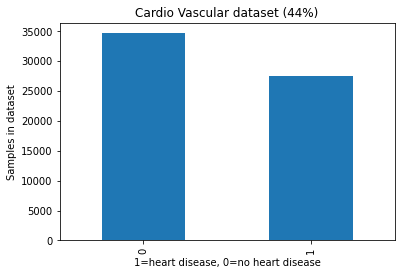

In [3]:
pd.value_counts(df['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (44%)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in dataset')
df['cardio'].value_counts()

The balance ratio is (27500/62179=0,4422715) approximately 44%.

# Train/Test split

The random_state is 42.

In [4]:
# Importing the splitter, classification model, and the metric
from sklearn.model_selection import train_test_split
#Splitting the data with stratification
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['cardio']), df['cardio'], test_size = 0.2, stratify = df['cardio'], random_state = 42)

# Logistic Regression with raw dataset

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75     27743
           1       0.70      0.56      0.62     22000

    accuracy                           0.70     49743
   macro avg       0.70      0.68      0.69     49743
weighted avg       0.70      0.70      0.69     49743



In [6]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.81      0.75      6936
           1       0.69      0.55      0.61      5500

    accuracy                           0.69     12436
   macro avg       0.69      0.68      0.68     12436
weighted avg       0.69      0.69      0.69     12436



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.754


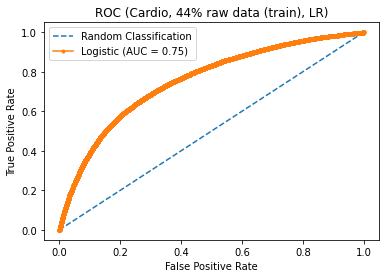

In [7]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 44% raw data (train), LR)')
# show the legend
pyplot.legend()
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.746


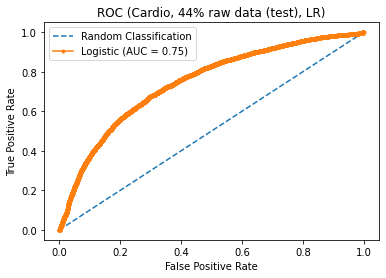

In [8]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 44% raw data (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# SVM with raw data

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78     27743
           1       0.74      0.63      0.68     22000

    accuracy                           0.74     49743
   macro avg       0.74      0.73      0.73     49743
weighted avg       0.74      0.74      0.74     49743



In [10]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77      6936
           1       0.72      0.62      0.67      5500

    accuracy                           0.73     12436
   macro avg       0.73      0.72      0.72     12436
weighted avg       0.73      0.73      0.72     12436



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.794


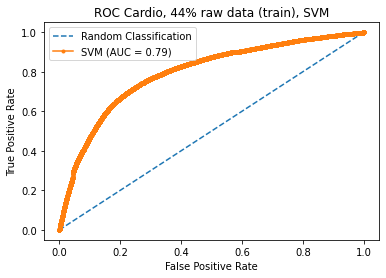

In [11]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 44% raw data (train), SVM')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.780


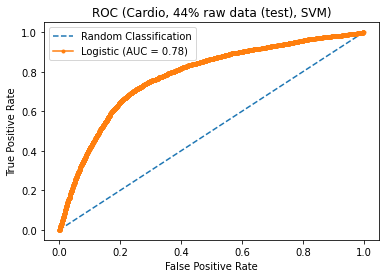

In [12]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 44% raw data (test), SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost 

In [13]:
import xgboost as xgb
import pickle
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [14]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.26088	validation_0-logloss:0.66694	validation_1-error:0.26544	validation_1-logloss:0.66740
[1]	validation_0-error:0.26092	validation_0-logloss:0.64565	validation_1-error:0.26520	validation_1-logloss:0.64659
[2]	validation_0-error:0.26092	validation_0-logloss:0.62829	validation_1-error:0.26520	validation_1-logloss:0.62953
[3]	validation_0-error:0.26092	validation_0-logloss:0.61370	validation_1-error:0.26520	validation_1-logloss:0.61525
[4]	validation_0-error:0.26092	validation_0-logloss:0.60170	validation_1-error:0.26520	validation_1-logloss:0.60369
[5]	validation_0-error:0.26092	validation_0-logloss:0.59170	validation_1-error:0.26520	validation_1-logloss:0.59406
[6]	validation_0-error:0.26092	validation_0-logloss:0.58329	validation_1-error:0.26520	validation_1-logloss:0.58596
[7]	validation_0-error:0.26084	validation_0-logloss:0.57619	validation_1-error:0.26504	validation_1-logloss:0.57897
[8]	validation_0-error:0.26080	validation_0-logloss:0.57018	validation_1

[71]	validation_0-error:0.25121	validation_0-logloss:0.52517	validation_1-error:0.25812	validation_1-logloss:0.53889
[72]	validation_0-error:0.25119	validation_0-logloss:0.52510	validation_1-error:0.25804	validation_1-logloss:0.53888
[73]	validation_0-error:0.25113	validation_0-logloss:0.52493	validation_1-error:0.25812	validation_1-logloss:0.53882
[74]	validation_0-error:0.25135	validation_0-logloss:0.52481	validation_1-error:0.25812	validation_1-logloss:0.53885
[75]	validation_0-error:0.25123	validation_0-logloss:0.52477	validation_1-error:0.25812	validation_1-logloss:0.53884
[76]	validation_0-error:0.25093	validation_0-logloss:0.52463	validation_1-error:0.25828	validation_1-logloss:0.53885
[77]	validation_0-error:0.25091	validation_0-logloss:0.52451	validation_1-error:0.25828	validation_1-logloss:0.53883
[78]	validation_0-error:0.25089	validation_0-logloss:0.52442	validation_1-error:0.25812	validation_1-logloss:0.53880
[79]	validation_0-error:0.25081	validation_0-logloss:0.52429	val

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [15]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79     27743
           1       0.75      0.65      0.70     22000

    accuracy                           0.75     49743
   macro avg       0.75      0.74      0.74     49743
weighted avg       0.75      0.75      0.75     49743



In [16]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78      6936
           1       0.74      0.64      0.69      5500

    accuracy                           0.74     12436
   macro avg       0.74      0.73      0.73     12436
weighted avg       0.74      0.74      0.74     12436



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.813


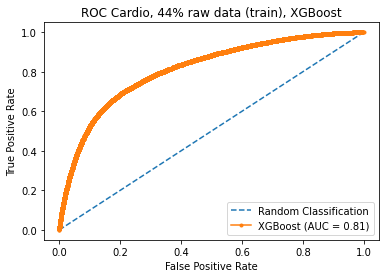

In [17]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 44% raw data (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.799


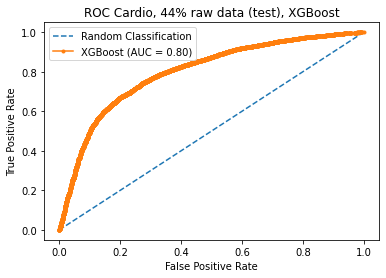

In [18]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 44% raw data (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Data augmentation

In the following part, the data gets perfectly balanced, by applying SMOTE, TVAE, and CTGAN to the raw dataset. The minority class is oversampled, by only creating samples with cardio=1. Afterwards, the machine learning algorithms run with the balaned datasets.

In [19]:
df_train = X_train
df_train['cardio'] = y_train

In [20]:
df_train.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
49437  63564  19089       1     159    87.0     12     80            1     2   
57584  86695  22044       1     160    60.0    120     70            1     1   
12311  85475  18104       1     166    85.0    130     90            1     2   
51565  69607  14438       1     160    62.0    120     80            1     1   
21815  54626  18763       2     170    89.0    180    100            1     1   

       smoke  alco  active  cardio  
49437      0     0       1       0  
57584      0     1       1       0  
12311      0     0       1       1  
51565      0     0       1       0  
21815      0     0       1       1

### SMOTE

1    27743
0    27743
Name: cardio, dtype: int64

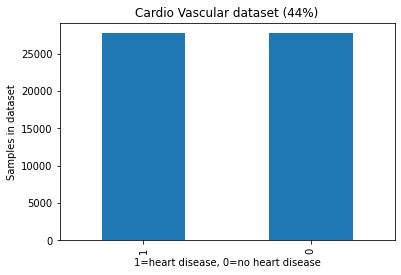

In [21]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(df_train[['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']], df_train['cardio'])
#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X, columns = ['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active'])
df_oversampler_y = pd.DataFrame(y, columns = ['cardio'])
pd.value_counts(df_oversampler_y['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (44%)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in dataset')
df_oversampler_y['cardio'].value_counts()

In [22]:
X_train = df_oversampler
y_train = df_oversampler_y

# Logistic Regression with data from SMOTE

In [23]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71     27743
           1       0.71      0.67      0.69     27743

    accuracy                           0.70     55486
   macro avg       0.70      0.70      0.70     55486
weighted avg       0.70      0.70      0.70     55486



In [24]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72      6936
           1       0.65      0.66      0.65      5500

    accuracy                           0.69     12436
   macro avg       0.69      0.69      0.69     12436
weighted avg       0.69      0.69      0.69     12436



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.761


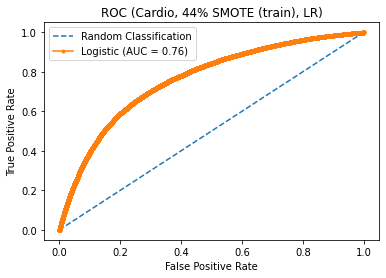

In [25]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 44% SMOTE (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [26]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 44% SMOTE (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.748


# SVM with data from SMOTE

In [27]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74     27743
           1       0.75      0.71      0.73     27743

    accuracy                           0.74     55486
   macro avg       0.74      0.74      0.74     55486
weighted avg       0.74      0.74      0.74     55486



In [28]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      6936
           1       0.69      0.69      0.69      5500

    accuracy                           0.72     12436
   macro avg       0.72      0.72      0.72     12436
weighted avg       0.72      0.72      0.72     12436



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.800


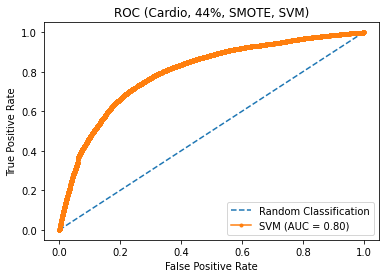

In [29]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 44%, SMOTE, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [30]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 44%, SMOTE, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.778


# XGBoost with SMOTE data

In [31]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.26244	validation_0-logloss:0.66597	validation_1-error:0.27139	validation_1-logloss:0.66849
[1]	validation_0-error:0.26243	validation_0-logloss:0.64383	validation_1-error:0.27123	validation_1-logloss:0.64847
[2]	validation_0-error:0.26405	validation_0-logloss:0.62579	validation_1-error:0.26906	validation_1-logloss:0.63213
[3]	validation_0-error:0.26118	validation_0-logloss:0.61070	validation_1-error:0.27155	validation_1-logloss:0.61866
[4]	validation_0-error:0.26409	validation_0-logloss:0.59806	validation_1-error:0.26898	validation_1-logloss:0.60738
[5]	validation_0-error:0.26140	validation_0-logloss:0.58745	validation_1-error:0.26825	validation_1-logloss:0.59795
[6]	validation_0-error:0.26167	validation_0-logloss:0.57825	validation_1-error:0.26849	validation_1-logloss:0.59026
[7]	validation_0-error:0.26237	validation_0-logloss:0.57074	validation_1-error:0.26833	validation_1-logloss:0.58362
[8]	validation_0-error:0.26234	validation_0-logloss:0.56440	validation_1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77     27743
           1       0.78      0.72      0.75     27743

    accuracy                           0.76     55486
   macro avg       0.76      0.76      0.76     55486
weighted avg       0.76      0.76      0.76     55486



In [33]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.78      0.77      6936
           1       0.71      0.67      0.69      5500

    accuracy                           0.73     12436
   macro avg       0.73      0.73      0.73     12436
weighted avg       0.73      0.73      0.73     12436



In [34]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 44% SMOTE (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.830


In [35]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 44% SMOTE (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.796


# Data augmentation with TVAE

In [36]:
df_train['cardio'].value_counts()

0    27743
1    22000
Name: cardio, dtype: int64

In [37]:
from sdv.tabular import TVAE
tvae = TVAE()

tvae.fit(df_train)
# Once trained generate samples
samples = tvae.sample(10000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df = pd.concat([df_train,samples])
tvae_result_df['cardio'].value_counts()

0    27743
1    26496
Name: cardio, dtype: int64

In [38]:
tvae.fit(tvae_result_df)
samples = tvae.sample(20000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df1 = pd.concat([tvae_result_df,samples])
tvae_result_df1['cardio'].value_counts()

1    34050
0    27743
Name: cardio, dtype: int64

In [39]:
tvae_result_df_1 = tvae_result_df1[tvae_result_df1['cardio'] == 1]
tvae_result_df_1['cardio'].value_counts()

1    34050
Name: cardio, dtype: int64

In [40]:
tvae_result_df_0 = tvae_result_df1[tvae_result_df1['cardio'] == 0]
tvae_result_df_0['cardio'].value_counts()

0    27743
Name: cardio, dtype: int64

In [41]:
train_df_1_bal = tvae_result_df_1.sample(n = 27743)
train_df_balanced = train_df_1_bal.append(tvae_result_df_0)

1    27743
0    27743
Name: cardio, dtype: int64

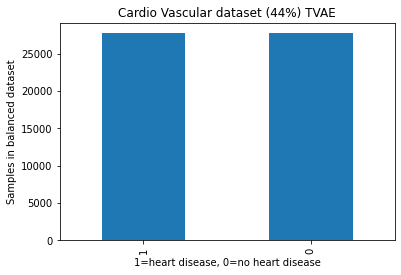

In [42]:
pd.value_counts(train_df_balanced['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (44%) TVAE')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in balanced dataset')
train_df_balanced['cardio'].value_counts()

In [43]:
X_train = train_df_balanced.drop(['cardio'], axis=1)
y_train = train_df_balanced['cardio']

### Logistic Regression with TVAE data

In [44]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.66      0.65      0.66     27743
           1       0.66      0.66      0.66     27743

    accuracy                           0.66     55486
   macro avg       0.66      0.66      0.66     55486
weighted avg       0.66      0.66      0.66     55486



In [45]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66      6936
           1       0.58      0.63      0.60      5500

    accuracy                           0.63     12436
   macro avg       0.63      0.63      0.63     12436
weighted avg       0.64      0.63      0.64     12436



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.729


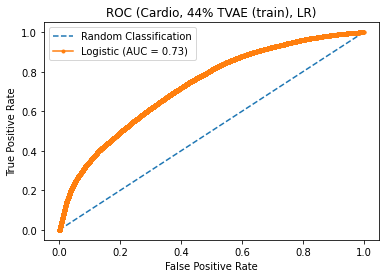

In [46]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 44% TVAE (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [47]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 44% TVAE (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.682


### SVM with TVAE balanced data

In [48]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.75      0.84      0.80     27743
           1       0.82      0.73      0.77     27743

    accuracy                           0.78     55486
   macro avg       0.79      0.78      0.78     55486
weighted avg       0.79      0.78      0.78     55486



In [49]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77      6936
           1       0.73      0.59      0.65      5500

    accuracy                           0.72     12436
   macro avg       0.72      0.71      0.71     12436
weighted avg       0.72      0.72      0.72     12436



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.856


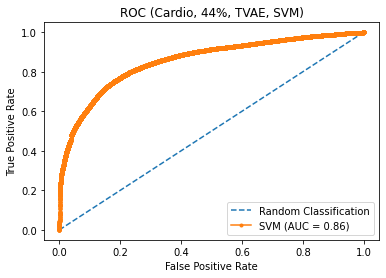

In [50]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 44%, TVAE, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.776


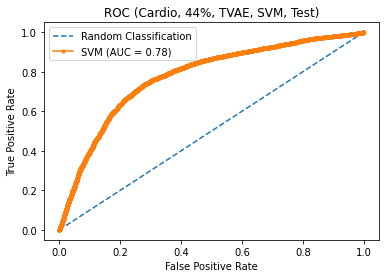

In [51]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 44%, TVAE, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### XGBoost with TVAE balanced data

In [52]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.23392	validation_0-logloss:0.66006	validation_1-error:0.29117	validation_1-logloss:0.67158
[1]	validation_0-error:0.22651	validation_0-logloss:0.63298	validation_1-error:0.27935	validation_1-logloss:0.65299
[2]	validation_0-error:0.22651	validation_0-logloss:0.61044	validation_1-error:0.27935	validation_1-logloss:0.63879
[3]	validation_0-error:0.22662	validation_0-logloss:0.59107	validation_1-error:0.27943	validation_1-logloss:0.62548
[4]	validation_0-error:0.22440	validation_0-logloss:0.57479	validation_1-error:0.27943	validation_1-logloss:0.61467
[5]	validation_0-error:0.22440	validation_0-logloss:0.56101	validation_1-error:0.27943	validation_1-logloss:0.60558
[6]	validation_0-error:0.22553	validation_0-logloss:0.54941	validation_1-error:0.27943	validation_1-logloss:0.59889
[7]	validation_0-error:0.22020	validation_0-logloss:0.53887	validation_1-error:0.27597	validation_1-logloss:0.59251
[8]	validation_0-error:0.21874	validation_0-logloss:0.52963	validation_1

[71]	validation_0-error:0.20584	validation_0-logloss:0.43945	validation_1-error:0.26254	validation_1-logloss:0.54604
[72]	validation_0-error:0.20596	validation_0-logloss:0.43936	validation_1-error:0.26295	validation_1-logloss:0.54600
[73]	validation_0-error:0.20549	validation_0-logloss:0.43886	validation_1-error:0.26311	validation_1-logloss:0.54580
[74]	validation_0-error:0.20546	validation_0-logloss:0.43866	validation_1-error:0.26295	validation_1-logloss:0.54587
[75]	validation_0-error:0.20539	validation_0-logloss:0.43853	validation_1-error:0.26278	validation_1-logloss:0.54592
[76]	validation_0-error:0.20549	validation_0-logloss:0.43840	validation_1-error:0.26287	validation_1-logloss:0.54584
[77]	validation_0-error:0.20553	validation_0-logloss:0.43835	validation_1-error:0.26287	validation_1-logloss:0.54587
[78]	validation_0-error:0.20549	validation_0-logloss:0.43825	validation_1-error:0.26278	validation_1-logloss:0.54582
[79]	validation_0-error:0.20524	validation_0-logloss:0.43796	val

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81     27743
           1       0.83      0.74      0.78     27743

    accuracy                           0.80     55486
   macro avg       0.80      0.80      0.80     55486
weighted avg       0.80      0.80      0.80     55486



In [54]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78      6936
           1       0.75      0.61      0.67      5500

    accuracy                           0.74     12436
   macro avg       0.74      0.72      0.73     12436
weighted avg       0.74      0.74      0.73     12436



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.873


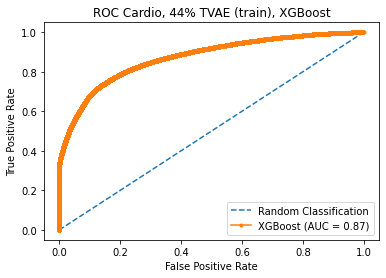

In [55]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 44% TVAE (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.796


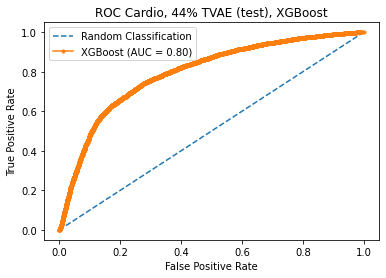

In [56]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 44% TVAE (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# CTGAN for balancing the dataset

In [57]:
df_train['cardio'].value_counts()

0    27743
1    22000
Name: cardio, dtype: int64

In [58]:
df_train_0 = df_train[df_train['cardio'] == 0]
train_df_0_sm = df_train_0.sample(n = 5000)

In [59]:
df_train_1 = df_train[df_train['cardio'] == 1]
train_df_1_sm = df_train_1.sample(n = 5000)

In [60]:
train_df_sm = train_df_1_sm.append(train_df_0_sm)
train_df_sm['cardio'].value_counts()

1    5000
0    5000
Name: cardio, dtype: int64

In [61]:
from ctgan import CTGANSynthesizer
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_sm, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(5000)
samples = samples[samples['cardio'] ==1.0]
samples['cardio'].value_counts()

1    2117
Name: cardio, dtype: int64

In [62]:
df_train_0 = df_train[df_train['cardio'] == 0]
train_df_0_med = df_train_0.sample(n = 8000)

In [63]:
df_train_1 = df_train[df_train['cardio'] == 1]
train_df_1_med = df_train_1.sample(n = 5000)
train_df_1_med = train_df_1_med.append(samples)
traindf_med = train_df_1_med.append(train_df_0_med)
traindf_med['cardio'].value_counts()

0    8000
1    7117
Name: cardio, dtype: int64

In [64]:
ctgan = CTGANSynthesizer()

ctgan.fit(traindf_med, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples1 = ctgan.sample(7000)
samples1 = samples[samples['cardio'] ==1.0]
samples1['cardio'].value_counts()

1    2117
Name: cardio, dtype: int64

In [65]:
df_train_0 = df_train[df_train['cardio'] == 0]
train_df_0_med = df_train_0.sample(n = 9000)
df_train_1 = df_train[df_train['cardio'] == 1]
train_df_1_med = df_train_1.sample(n = 1000)
train_df_1_med = train_df_1_med.append(samples)
train_df_1_med = train_df_1_med.append(samples1)
traindf_med = train_df_1_med.append(train_df_0_med)
traindf_med['cardio'].value_counts()

0    9000
1    5234
Name: cardio, dtype: int64

In [66]:
ctgan = CTGANSynthesizer()

ctgan.fit(traindf_med, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples2 = ctgan.sample(7000)
samples2 = samples[samples['cardio'] ==1.0]
samples2['cardio'].value_counts()

1    2117
Name: cardio, dtype: int64

In [67]:
samples_all = samples2.append(samples1)

In [68]:
samples_all = samples_all.append(samples)

In [69]:
samples_all['cardio'].value_counts()

1    6351
Name: cardio, dtype: int64

In [70]:
samples_balanced = samples_all.sample(n = 5743)

In [71]:
df_train_balanced = df_train.append(samples_balanced)
df_train_balanced['cardio'].value_counts()

1    27743
0    27743
Name: cardio, dtype: int64

In [72]:
X_train = df_train_balanced.drop(['cardio'], axis=1)
y_train = df_train_balanced['cardio']

## Logistic Regression with CTGAN data

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71     27743
           1       0.72      0.67      0.69     27743

    accuracy                           0.70     55486
   macro avg       0.70      0.70      0.70     55486
weighted avg       0.70      0.70      0.70     55486



In [74]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      6936
           1       0.66      0.65      0.65      5500

    accuracy                           0.70     12436
   macro avg       0.69      0.69      0.69     12436
weighted avg       0.70      0.70      0.70     12436



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.766


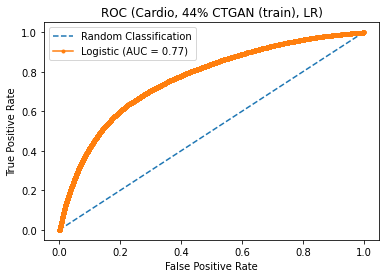

In [75]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 44% CTGAN (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.750


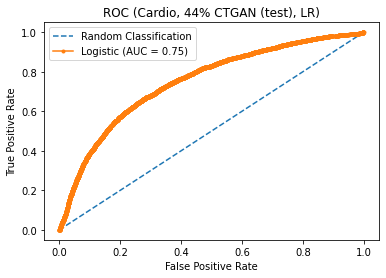

In [76]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 44% CTGAN (test), LR)')
# show the legend
pyplot.legend()
# show the plot

## SVM with CTGAN data

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75     27743
           1       0.76      0.71      0.73     27743

    accuracy                           0.74     55486
   macro avg       0.74      0.74      0.74     55486
weighted avg       0.74      0.74      0.74     55486



In [78]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76      6936
           1       0.70      0.69      0.69      5500

    accuracy                           0.73     12436
   macro avg       0.73      0.73      0.73     12436
weighted avg       0.73      0.73      0.73     12436



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.805


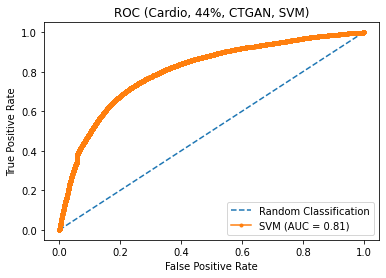

In [79]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 44%, CTGAN, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.779


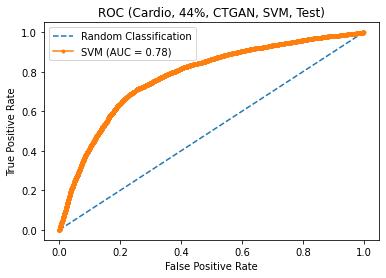

In [80]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 44%, CTGAN, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## XGBoost with CTGAN data

In [81]:
import xgboost as xgb
import pickle
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [82]:
model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.25891	validation_0-logloss:0.66486	validation_1-error:0.26970	validation_1-logloss:0.66816
[1]	validation_0-error:0.25788	validation_0-logloss:0.64181	validation_1-error:0.26970	validation_1-logloss:0.64805
[2]	validation_0-error:0.25587	validation_0-logloss:0.62285	validation_1-error:0.27123	validation_1-logloss:0.63160
[3]	validation_0-error:0.25579	validation_0-logloss:0.60700	validation_1-error:0.27099	validation_1-logloss:0.61804
[4]	validation_0-error:0.25583	validation_0-logloss:0.59378	validation_1-error:0.27123	validation_1-logloss:0.60674
[5]	validation_0-error:0.25579	validation_0-logloss:0.58263	validation_1-error:0.27099	validation_1-logloss:0.59722
[6]	validation_0-error:0.25637	validation_0-logloss:0.57313	validation_1-error:0.26994	validation_1-logloss:0.58966
[7]	validation_0-error:0.25596	validation_0-logloss:0.56517	validation_1-error:0.27147	validation_1-logloss:0.58310
[8]	validation_0-error:0.25524	validation_0-logloss:0.55853	validation_1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [83]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78     27743
           1       0.79      0.73      0.76     27743

    accuracy                           0.77     55486
   macro avg       0.77      0.77      0.77     55486
weighted avg       0.77      0.77      0.77     55486



In [84]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77      6936
           1       0.72      0.66      0.69      5500

    accuracy                           0.74     12436
   macro avg       0.73      0.73      0.73     12436
weighted avg       0.74      0.74      0.73     12436



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.836


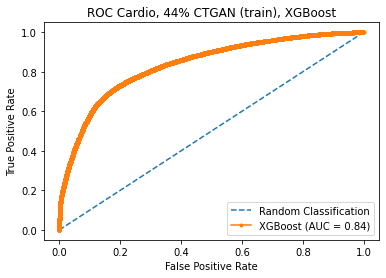

In [85]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 44% CTGAN (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [86]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 44% CTGAN (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.794
